<a href="https://colab.research.google.com/github/AsakuraY0h12/Data-for-Social/blob/main/NYC_Recycling_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Green-Challenge - Recycling Behavior in NYC Boroughs

## Motivation.

The data being investigated, are 4 different dataset all provided by the city of NY and published on https://nycopendata.socrata.com

1. Recycling_Diversion_and_Capture_Rates
2. DSNY_Monthly_Tonnage_Data
3. Public_Recycling_Bins
4. Census2010


We chose these dataset as to fit inline with this years theme of sustainability. In addition to the fact that New York is the 45th biggest cities in the world with a population of 8 million and has set a goal to send Zero waste to landfill by the year 2030 we find this very interesting and we want to investigate is this truly even feasible can it be achieved or is it it a greenwashing marketing plan with good intention but no real scope to be achieved in the set time frame. 

We believed these datasets can provide insights to see how effectively the city manages their waste and what progress they have made or are making to become more sustainable and environmentally aware.

The goal for the end user is to be able to visualise by way of interactive plots, the current recycle infrastructure in New york. To grasp an understanding of ways in which NYC plans to achieve their zero waste goals and to see flaws and areas for potential improvements. Ultimately to assess if the current behaviour of the citizens is productive to  achieve the targets set for 2030 or if there is far more work to be done.


## Basic Stats & Data Analysis

**Basic Stats**


1.   *Census Dataset*<br>
This dataset includes the demographic characteristics of NYC. Our goal is to retrieve the population of each borough in order to fit it in our model. However, different modifications of this dataset could provide usuful insights. The columns of this dataset are `Borough`,	`Sex`,	`Race/Ethnicity` and `Population`. By changing the type of the population column we can derive statistics like population/borough,population/borough/sex and population/borough/race.


2.   *Recycling Facilities Dataset*<br>
Recycling facilities dataset includes `Borough`,	`Site type`,	`Park/Site Name`,	`Address`,	`Latitude`,	`Longitude`,	`Counts`(we created this column).
Modifications in this dataset could provide us information about the location of the recycling facilities in each borough as long as the total number of those per borough. It will also be fitted in the model later on. 

3.   *Recycling Diversion Dataset* <br>
This dataset is very important. It includes columns like `Zone`,	`District`,	`Fiscal Month Number`,	`Fiscal Year`,	`Month Name`,	`Diversion Rate-Total (Total Recycling / Total Waste)`,	`Capture Rate-Paper (Total Paper / Max Paper)`,	`Capture Rate-MGP (Total MGP / Max MGP)`,	`Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100`. For the purpose of this analysis we are going to need the `Diversion Rate-Total (Total Recycling / Total Waste)` for each month from 2016-2020 which is the dependent variable we want to predict. In order to derieve that information we need to understand how the dataset is organized. First of all, the observations are using a different calendar. The Fiscal  year start from July 1st and ends in June 30th. So, in order to convert it in regular form we need to substrack one(-1) from the column fiscal year each time the respective month is July-December. Another thing that needed attention were the names of the `Zones`. All the specific zones were modified into their respective borough in oredr to be align with the other datasets(Tonnage Dataset) for the creation of the Merged Dataset i.e(Brooklyn North -> Brooklyn). Finally the dataframe was orginized by `Borough`,`YEAR` and `MONTH`.  


4.   *Tonnage Dataset*<br>
The last dataset that we are going to use is also very important. It includes most of the independent variables that we will use for our predictions. The `MONTH` column need to be splitted in order to be ready for the future merger. Moreover the variables of this dataset are in tonnes so we need to find their ratio to be useful for our predictions. Also, we need to restrict the dataset range for the years 2016-2020.



---



**Data Analysis**

After cleaning and preparation,**Recycling_Diversion_and_Capture_Rates(df2)** and **DSNY_Monthly_Tonnage_Data(df1)** data sets were ready to be merged together. Two new columns, `Number of Bins` and `Population` were added from **Public_Recycling_Bins** and **Census2010** datasets respectively. The merged dataset now icludes also demographic characteristics and is almost ready to be fed in the Linear regression model.

The intention is to predict `Diversion Rate-Total`, based on `REFUSETONSCOLLECTED`, `PAPERTONSCOLLECTED`,`MGPTONSCOLLECTED`, `RESORGANICSTONS`, `SCHOOLORGANICTONS`, `LEAVESORGANICTONS`, `Population`, `Number of Bins`.

Normalization of the dataset was required so all the columns have the same scale(0-1), otherwise values like the `Number of bins` and `Population` would impact the model much more than wanted and result in inaccurate predictions.

Also, we created a new column named `random` filled with random numbers between
0-1 in order to check which independent variables are useful for our model.

The Prediction score of our model  has 78% accuracy! 

This score is achieved with the column `random` included. Using the statistics library we perform an Ordinary Least Squares regression for estimating coefficients of linear regression. We set the threshold of singificance to 3% so  p-statistic should be less that 0.03. Thus, we decided to subtract the columns `random` and `LEAVESORGANICTONS` and retrain the model.

Our new model score has accuracy of 80% ! Thats not bad! :)


---


**Machine Learning**

Machine Learning is a subfield of AI which is broadly known as the capability of machine to immitate human behavior. AI systems can solve complex problems in a similar way and even faster than humans. 

Linear Regression is a simple model and ,usually, the first ML algorith that most scientists come across. LR is a very powerful technique and can be used to understand the factors that influence the alternation of a variable through the time. In our case the dependent variable is Diversion rate and the objective is to forecast the rates in the coming months by analyzing the Tonnage data provided by the NYC Department of Sanitation previous months. 

It can also be used to gain various insights about the citizens recycling behaviour. Last but not least, this model could be used for the identification of trends like recycling behavior of people during some lazy time spans(Christmas, Easter), or predictions based on weather predictions (Summer,Winter). 

We will use `shap or some other feature importance` to the calculate the feature imprtance to better communicate why our model predicts the way it does.





### Installs and Imports

In [1]:
!pip install shap

     |████████████████████████████████| 564 kB 29.4 MB/s 


In [2]:
# Import of libraries
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from folium import plugins
from folium.plugins import HeatMap
import folium
from warnings import simplefilter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import shap
import matplotlib.pyplot as plt
%matplotlib inline
import collections
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource
from sklearn import tree
import timeit
import graphviz
from bokeh.models import HoverTool
import branca
import statsmodels.api as sm

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [3]:
# Different upload option for Google Drive Users
# # Upload of the files
# from google.colab import files
# uploaded = files.upload()

# # Loading the Data 
# Monthly_Recycling_Diversion = pd.read_csv("Recycling_Diversion_and_Capture_Rates.csv")
# Location_of_Public_Recycling_Bins = pd.read_csv('Public_Recycling_Bins.csv')
# DSNY_Monthly_Tonnage_Data = pd.read_csv('DSNY_Monthly_Tonnage_Data.csv')
# Census = pd.read_csv('Census2010.csv')

In [5]:
# Loading the Data
url1= "https://raw.githubusercontent.com/AsakuraY0h12/Data-for-Social/main/data/Recycling_Diversion_and_Capture_Rates.csv"
url2= "https://raw.githubusercontent.com/AsakuraY0h12/Data-for-Social/main/data/Public_Recycling_Bins.csv"
url3= "https://raw.githubusercontent.com/AsakuraY0h12/Data-for-Social/main/data/DSNY_Monthly_Tonnage_Data.csv"
url4= "https://raw.githubusercontent.com/AsakuraY0h12/Data-for-Social/main/data/Census2010.csv"

Monthly_Recycling_Diversion = pd.read_csv(url1)
Location_of_Public_Recycling_Bins = pd.read_csv(url2)
DSNY_Monthly_Tonnage_Data = pd.read_csv(url3)
Census = pd.read_csv(url4)

### Census Dataset

In [6]:
# Demographic dataset 
Census=Census.iloc[:50,:]
Census

,Borough,Sex,Race/Ethnicity,Population
0,Bronx,Male,"White, non-Hispanic","73,573"
1,Bronx,Male,"Black, non-Hispanic","191,245"
2,Bronx,Male,Hispanic,"348,435"
3,Bronx,Male,"Asian/Pacific Islander, non-Hispanic","23,284"
4,Bronx,Male,"Other races, non-Hispanic","13,096"
5,Bronx,Female,"White, non-Hispanic","77,636"
6,Bronx,Female,"Black, non-Hispanic","225,450"
7,Bronx,Female,Hispanic,"392,978"
8,Bronx,Female,"Asian/Pacific Islander, non-Hispanic","24,449"
9,Bronx,Female,"Other races, non-Hispanic","14,962"


In [7]:
# Setting population as numbers
Census["Population"]=Census["Population"].str.replace(',', '')
Census["Population"]=pd.to_numeric(Census['Population'])
Census

,Borough,Sex,Race/Ethnicity,Population
0,Bronx,Male,"White, non-Hispanic",73573
1,Bronx,Male,"Black, non-Hispanic",191245
2,Bronx,Male,Hispanic,348435
3,Bronx,Male,"Asian/Pacific Islander, non-Hispanic",23284
4,Bronx,Male,"Other races, non-Hispanic",13096
5,Bronx,Female,"White, non-Hispanic",77636
6,Bronx,Female,"Black, non-Hispanic",225450
7,Bronx,Female,Hispanic,392978
8,Bronx,Female,"Asian/Pacific Islander, non-Hispanic",24449
9,Bronx,Female,"Other races, non-Hispanic",14962


In [8]:
Population_Borough = Census.groupby('Borough').sum()
Population_Borough

,Population
Borough,
Bronx,1385108
Brooklyn,2504700
Manhattan,1585873
Queens,2230722
Staten Island,468730


In [9]:
Sex_Borough=Census.groupby(['Borough', 'Sex']).agg({'Population':'sum'})
Sex_Borough

Population
Borough       Sex               
Bronx         Female      735475
              Male        649633
Brooklyn      Female     1323322
              Male       1181378
Manhattan     Female      841432
              Male        744441
Queens        Female     1150919
              Male       1079803
Staten Island Female      241441
              Male        227289

In [10]:
Race_Borough=Census.groupby(['Borough', 'Race/Ethnicity']).agg({'Population':'sum'})
Race_Borough

Population
Borough       Race/Ethnicity                                  
Bronx         Asian/Pacific Islander, non-Hispanic       47733
              Black, non-Hispanic                       416695
              Hispanic                                  741413
              Other races, non-Hispanic                  28058
              White, non-Hispanic                       151209
Brooklyn      Asian/Pacific Islander, non-Hispanic      260762
              Black, non-Hispanic                       799066
              Hispanic                                  496285
              Other races, non-Hispanic                  55281
              White, non-Hispanic                       893306
Manhattan     Asian/Pacific Islander, non-Hispanic      178157
              Black, non-Hispanic                       205340
              Hispanic                                  403577
              Other races, non-Hispanic                  37306
              White, non-Hispanic                       761493
Queens        Asian/Pacific Islander, non-Hispanic      509428
              Black, non-Hispanic                       395881
              Hispanic                                  613750
              Other races, non-Hispanic                  94936
              White, non-Hispanic                       616727
Staten Island Asian/Pacific Islander, non-Hispanic       34834
              Black, non-Hispanic                        44313
              Hispanic                                   81051
              Other races, non-Hispanic                   8363
              White, non-Hispanic                       300169

In [11]:
Total=Census.groupby(['Borough', 'Sex', 'Race/Ethnicity']).agg({'Population':'sum'})
Total

Population
Borough       Sex    Race/Ethnicity                                  
Bronx         Female Asian/Pacific Islander, non-Hispanic       24449
                     Black, non-Hispanic                       225450
                     Hispanic                                  392978
                     Other races, non-Hispanic                  14962
                     White, non-Hispanic                        77636
              Male   Asian/Pacific Islander, non-Hispanic       23284
                     Black, non-Hispanic                       191245
                     Hispanic                                  348435
                     Other races, non-Hispanic                  13096
                     White, non-Hispanic                        73573
Brooklyn      Female Asian/Pacific Islander, non-Hispanic      132832
                     Black, non-Hispanic                       449025
                     Hispanic                                  253278
                     Other races, non-Hispanic                  29629
                     White, non-Hispanic                       458558
              Male   Asian/Pacific Islander, non-Hispanic      127930
                     Black, non-Hispanic                       350041
                     Hispanic                                  243007
                     Other races, non-Hispanic                  25652
                     White, non-Hispanic                       434748
Manhattan     Female Asian/Pacific Islander, non-Hispanic       99663
                     Black, non-Hispanic                       111124
                     Hispanic                                  213405
                     Other races, non-Hispanic                  20400
                     White, non-Hispanic                       396840
              Male   Asian/Pacific Islander, non-Hispanic       78494
                     Black, non-Hispanic                        94216
                     Hispanic                                  190172
                     Other races, non-Hispanic                  16906
                     White, non-Hispanic                       364653
Queens        Female Asian/Pacific Islander, non-Hispanic      260986
                     Black, non-Hispanic                       218673
                     Hispanic                                  304996
                     Other races, non-Hispanic                  49300
                     White, non-Hispanic                       316964
              Male   Asian/Pacific Islander, non-Hispanic      248442
                     Black, non-Hispanic                       177208
                     Hispanic                                  308754
                     Other races, non-Hispanic                  45636
                     White, non-Hispanic                       299763
Staten Island Female Asian/Pacific Islander, non-Hispanic       17942
                     Black, non-Hispanic                        23654
                     Hispanic                                   40735
                     Other races, non-Hispanic                   4355
                     White, non-Hispanic                       154755
              Male   Asian/Pacific Islander, non-Hispanic       16892
                     Black, non-Hispanic                        20659
                     Hispanic                                   40316
                     Other races, non-Hispanic                   4008
                     White, non-Hispanic                       145414

### Recycling facilities Dataset

In [12]:
Bins_stats= Location_of_Public_Recycling_Bins.copy()
Bins_stats["Counts"]=1
Bins_stats

,Borough,Site type,Park/Site Name,Address,Latitude,Longitude,Counts
0,Bronx,Subproperty,227th St. Plgd,E 227 St/Bronx River Pkway,40.890849,-73.864224,1
1,Bronx,Subproperty,Allerton Ballfields,Allerton Ave & Moshulu Pkway,40.848891,-73.877128,1
2,Bronx,Outdoor,Arthur Ave & E 187 St,Arthur Ave & 187 St,40.855570,-73.887565,1
3,Bronx,Outdoor,Barstow Mansion,"895 Shore Road, Pelham Bay Park",40.871864,-73.805549,1
4,Bronx,Subproperty,Bradley Playground,2001-2017 Bronx Park E,40.851889,-73.868549,1
...,...,...,...,...,...,...,...
540,Staten Island,Indoor,West Brighton Pool,899 Henderson Ave,40.637121,-74.119287,1
541,Staten Island,Outdoor,Willowbrook Park,Willowbrook Park,40.603832,-74.158697,1
542,Staten Island,Outdoor,Willowbrook Park,Willowbrook Park,40.603828,-74.161250,1
543,Staten Island,Outdoor,Wolfe's Pond,Wolfe's Pond,40.517368,-74.190913,1


In [13]:
# Deleting unecessary columns
del Bins_stats["Address"]
del Bins_stats["Latitude"]
del Bins_stats["Longitude"]
del Bins_stats["Park/Site Name"]
Bins_fp=Bins_stats.groupby(['Borough']).count()#'Site type']).count() # for prediction
del Bins_fp["Site type"]
Bins_fv=Bins_stats.groupby(['Borough','Site type']).count()           # for visualization 

In [14]:
Bins_fp

,Counts
Borough,
Bronx,108
Brooklyn,89
Brooklyn,5
Manhattan,184
Queens,117
Staten Island,42


In [15]:
Bins_fv

Counts
Borough       Site type          
Bronx         Greenthumb       13
              Indoor            8
              Outdoor          22
              Outdoor          49
              Subproperty      16
Brooklyn      Greenthumb       15
              Indoor            6
              Outdoor           9
              Outdoor          59
Brooklyn      Outdoor           5
Manhattan     Greenthumb       11
              Indoor           17
              Outdoor          43
              Outdoor         112
              Subproperty       1
Queens        Greenthumb        5
              Indoor           14
              Outdoor          36
              Outdoor          53
              Subproperty       9
Staten Island Indoor           10
              Outdoor           2
              Outdoor          27
              Subproperty       3

### Recycling Diversion Dataset

In [16]:
Monthly_Recycling_Diversion

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn North,BKN01,10,2019,April,14.7,44.9,43.0,44.1
1,Brooklyn North,BKN02,10,2019,April,20.0,34.2,57.9,41.2
2,Brooklyn North,BKN03,10,2019,April,12.2,33.5,44.9,38.2
3,Brooklyn North,BKN04,10,2019,April,15.5,35.2,68.5,48.8
4,Brooklyn North,BKN05,10,2019,April,10.1,22.3,45.1,31.5
...,...,...,...,...,...,...,...,...,...
2827,Queens West,QW06,3,2016,September,20.1,30.4,68.0,39.0
2828,Queens West,QW09,3,2016,September,17.4,41.1,79.7,54.3
2829,Staten Island,SI01,3,2016,September,18.7,39.5,71.7,49.7
2830,Staten Island,SI02,3,2016,September,19.0,44.5,75.0,54.1


In [17]:
# Modifying the MRD dataset in order to ready for merging with DSNY 

# Modifying the Zone column
Monthly_Recycling_Diversion["Zone"].replace({"Brooklyn North": "Brooklyn","Brooklyn South": "Brooklyn",
                                             "Queens East": "Queens","Queens West": "Queens"}, inplace=True)

Monthly_Recycling_Diversion["BOROUGH"]=Monthly_Recycling_Diversion["Zone"]

# Switching fiscal years to calendar years (fiscal years start in July and end in june)
Monthly_Recycling_Diversion["YEAR"]=Monthly_Recycling_Diversion["Fiscal Year"]
Monthly_Recycling_Diversion["Month Name"].replace({"January": "01","February": "02",
                                             "March": "03","April": "04", "May": "05",
                                             "June": "06","July": "07", "August": "08","September": "09",
                                             "October": "10","November": "11", "December": "12"}, inplace=True)

Monthly_Recycling_Diversion["MONTH"]=Monthly_Recycling_Diversion["Month Name"]

# Switching fiscal years to calendar years (fiscal years start in July and end in june)
Monthly_Recycling_Diversion["Month Name"]=np.where(Monthly_Recycling_Diversion["Month Name"] < "07" , Monthly_Recycling_Diversion["YEAR"]+1,Monthly_Recycling_Diversion["YEAR"])
Monthly_Recycling_Diversion["YEAR"]=Monthly_Recycling_Diversion["Month Name"]
del Monthly_Recycling_Diversion["Zone"]
del Monthly_Recycling_Diversion["Fiscal Year"]
del Monthly_Recycling_Diversion["Fiscal Month Number"]
del Monthly_Recycling_Diversion["Month Name"]
del Monthly_Recycling_Diversion["District"]
Monthly_Recycling_Diversion

,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100,BOROUGH,YEAR,MONTH
0,14.7,44.9,43.0,44.1,Brooklyn,2020,04
1,20.0,34.2,57.9,41.2,Brooklyn,2020,04
2,12.2,33.5,44.9,38.2,Brooklyn,2020,04
3,15.5,35.2,68.5,48.8,Brooklyn,2020,04
4,10.1,22.3,45.1,31.5,Brooklyn,2020,04
...,...,...,...,...,...,...,...
2827,20.1,30.4,68.0,39.0,Queens,2016,09
2828,17.4,41.1,79.7,54.3,Queens,2016,09
2829,18.7,39.5,71.7,49.7,Staten Island,2016,09
2830,19.0,44.5,75.0,54.1,Staten Island,2016,09


In [18]:
# Deleting columns we do not need
df2=Monthly_Recycling_Diversion.copy()
del df2["Capture Rate-Paper (Total Paper / Max Paper)"]
del df2["Capture Rate-MGP (Total MGP / Max MGP)"]
del df2["Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100"]

In [19]:
# Organize the dataset per Borough/YEAR/MONTH
df2=df2.groupby(['BOROUGH', 'YEAR',"MONTH"]).agg({'Diversion Rate-Total (Total Recycling / Total Waste)':"mean"})
df2

Diversion Rate-Total (Total Recycling / Total Waste)
BOROUGH       YEAR MONTH                                                      
Bronx         2016 07                                             12.125000   
                   08                                             12.241667   
                   09                                             12.650000   
                   10                                             12.525000   
                   11                                             11.966667   
...                                                                     ...   
Staten Island 2020 02                                             20.600000   
                   03                                             20.166667   
                   04                                             19.666667   
                   05                                             18.933333   
                   06                                             20.433333   

[240 rows x 1 columns]

### Tonnage Dataset

In [20]:
DSNY_Monthly_Tonnage_Data

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1993 / 11,Manhattan,01,625.2,119.4,34.4,NaN,NaN,NaN,NaN,1.0
1,1992 / 03,Manhattan,01,726.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1995 / 08,Manhattan,01,627.5,82.4,35.6,NaN,NaN,NaN,NaN,1.0
3,1991 / 08,Manhattan,01,695.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1995 / 09,Manhattan,01,633.1,117.2,45.8,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21991,2019 / 02,Bronx,06,1921.2,117.2,167.9,10.6,29.7,NaN,NaN,2.0
21992,2018 / 10,Bronx,06,2281.1,145.2,215.7,8.1,73.9,NaN,NaN,2.0
21993,2017 / 12,Bronx,06,2087.1,132.1,165.0,NaN,41.2,NaN,NaN,2.0
21994,2019 / 04,Bronx,06,2246.0,144.8,195.8,12.1,34.7,NaN,NaN,2.0


In [21]:
# Splitting the date column in 2 different columns (YEAR,MONTH)
split_data = DSNY_Monthly_Tonnage_Data["MONTH"].str.split(" / ")
data = split_data.to_list()
names = ["YEAR", "MONTH"]
new_df = pd.DataFrame(data, columns=names)

del DSNY_Monthly_Tonnage_Data["MONTH"]
DSNY_Monthly_Tonnage_Data=DSNY_Monthly_Tonnage_Data.join(new_df)
DSNY_Monthly_Tonnage_Data

,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID,YEAR,MONTH
0,Manhattan,01,625.2,119.4,34.4,NaN,NaN,NaN,NaN,1.0,1993,11
1,Manhattan,01,726.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1992,03
2,Manhattan,01,627.5,82.4,35.6,NaN,NaN,NaN,NaN,1.0,1995,08
3,Manhattan,01,695.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1991,08
4,Manhattan,01,633.1,117.2,45.8,NaN,NaN,NaN,NaN,1.0,1995,09
...,...,...,...,...,...,...,...,...,...,...,...,...
21991,Bronx,06,1921.2,117.2,167.9,10.6,29.7,NaN,NaN,2.0,2019,02
21992,Bronx,06,2281.1,145.2,215.7,8.1,73.9,NaN,NaN,2.0,2018,10
21993,Bronx,06,2087.1,132.1,165.0,NaN,41.2,NaN,NaN,2.0,2017,12
21994,Bronx,06,2246.0,144.8,195.8,12.1,34.7,NaN,NaN,2.0,2019,04


In [22]:
# Restrict the dataset from 2016 to 2020
DSNY_Monthly_Tonnage_Data=DSNY_Monthly_Tonnage_Data[(DSNY_Monthly_Tonnage_Data["YEAR"]>'2015')]
DSNY_Monthly_Tonnage_Data=DSNY_Monthly_Tonnage_Data[(DSNY_Monthly_Tonnage_Data["YEAR"]<'2021')]
DSNY_Monthly_Tonnage_Data.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

# Deleting non-needed columns
del DSNY_Monthly_Tonnage_Data["index"]
del DSNY_Monthly_Tonnage_Data["COMMUNITYDISTRICT"]
del DSNY_Monthly_Tonnage_Data["BOROUGH_ID"]

DSNY_Monthly_Tonnage_Data=DSNY_Monthly_Tonnage_Data.iloc[:2832,:]
DSNY_Monthly_Tonnage_Data['YEAR']=DSNY_Monthly_Tonnage_Data['YEAR'].astype(int)
DSNY_Monthly_Tonnage_Data

,BOROUGH,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,YEAR,MONTH
0,Brooklyn,3356.9,424.4,380.3,120.1,NaN,2.5,NaN,2016,11
1,Brooklyn,3204.6,418.8,392.7,77.7,NaN,NaN,NaN,2016,09
2,Brooklyn,3375.8,424.6,395.0,79.0,NaN,NaN,NaN,2018,07
3,Brooklyn,3395.3,415.9,440.0,1.3,NaN,NaN,NaN,2020,05
4,Brooklyn,3722.6,424.6,457.7,NaN,NaN,NaN,NaN,2020,08
...,...,...,...,...,...,...,...,...,...,...
2827,Queens,3165.6,425.1,486.5,5.4,NaN,NaN,NaN,2020,05
2828,Queens,3815.6,317.2,364.9,NaN,NaN,NaN,NaN,2017,04
2829,Queens,3855.9,347.7,382.7,NaN,NaN,NaN,16.5,2017,01
2830,Queens,3999.5,307.2,342.9,NaN,NaN,NaN,NaN,2016,04


In [23]:
df1=DSNY_Monthly_Tonnage_Data.copy()
del df1["BOROUGH"]

In [24]:
df1.fillna(0,inplace=True)

In [25]:
# Converting all columns into integers
for col in df1.columns:
    df1[col]=df1[col].astype(int)  

In [26]:
# Turn the monthly tonnage in tonnage ratios
for col in df1.columns:
    df1[col]=df1[col] / df1.groupby("MONTH")[col].transform('sum')
    
df1.fillna(0,inplace=True)

In [27]:
# Recreating Borough,Year,Month columns
df1["BOROUGH"] = DSNY_Monthly_Tonnage_Data["BOROUGH"]
df1["YEAR"] = DSNY_Monthly_Tonnage_Data["YEAR"]
df1["MONTH"] = DSNY_Monthly_Tonnage_Data["MONTH"]

In [28]:
# Organize the dataset per Borough/YEAR/MONTH
df1=df1.groupby(['BOROUGH', 'YEAR',"MONTH"]).agg({'REFUSETONSCOLLECTED':"mean", 'PAPERTONSCOLLECTED':"mean",
                                                       'MGPTONSCOLLECTED':"mean", 'RESORGANICSTONS':"mean", 'SCHOOLORGANICTONS':"mean",
       'LEAVESORGANICTONS':"mean", 'XMASTREETONS':"mean"})
df1

REFUSETONSCOLLECTED  PAPERTONSCOLLECTED  \
BOROUGH       YEAR MONTH                                            
Bronx         2016 01                0.003252            0.001705   
                   02                0.003528            0.002529   
                   03                0.003852            0.002132   
                   04                0.003229            0.002200   
                   05                0.003226            0.002201   
...                                       ...                 ...   
Staten Island 2020 08                0.006531            0.006333   
                   09                0.006642            0.006212   
                   10                0.006633            0.006802   
                   11                0.007198            0.006308   
                   12                0.006072            0.006725   

                          MGPTONSCOLLECTED  RESORGANICSTONS  \
BOROUGH       YEAR MONTH                                      
Bronx         2016 01             0.002233         0.000320   
                   02             0.003248         0.000186   
                   03             0.003034         0.000000   
                   04             0.002713         0.000676   
                   05             0.002759         0.000840   
...                                    ...              ...   
Staten Island 2020 08             0.007267         0.000000   
                   09             0.007911         0.000000   
                   10             0.008000         0.000000   
                   11             0.006614         0.000000   
                   12             0.006849         0.000000   

                          SCHOOLORGANICTONS  LEAVESORGANICTONS  XMASTREETONS  
BOROUGH       YEAR MONTH                                                      
Bronx         2016 01              0.001778           0.000000      0.001389  
                   02              0.001696           0.000000      0.000000  
                   03              0.003806           0.000000      0.000000  
                   04              0.003194           0.000000      0.000000  
                   05              0.003279           0.000000      0.000000  
...                                     ...                ...           ...  
Staten Island 2020 08              0.000000           0.000000      0.000000  
                   09              0.000000           0.000000      0.000000  
                   10              0.000000           0.000000      0.000000  
                   11              0.000000           0.000056      0.000000  
                   12              0.000000           0.000244      0.000000  

[300 rows x 7 columns]

### Merged Dataset

In [29]:
# Merging  Diversion Rate(df2) and Montly Tonnage(df1) datasets
Merged=pd.merge(df2, df1, on=["YEAR", "MONTH","BOROUGH"])
Merged=Merged.sort_values(by=['YEAR'],ascending =False)
Merged=Merged.reset_index()
Merged

,YEAR,MONTH,BOROUGH,Diversion Rate-Total (Total Recycling / Total Waste),REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS
0,2020,06,Staten Island,20.433333,0.006649,0.006849,0.008283,0.000000,0.000000,0.000000,0.0
1,2020,03,Bronx,14.041667,0.003357,0.002546,0.003787,0.005875,0.000000,0.000000,0.0
2,2020,06,Manhattan,21.391667,0.002837,0.003679,0.003341,0.000000,0.000000,0.000000,0.0
3,2020,06,Brooklyn,17.016667,0.004495,0.004286,0.004543,0.000000,0.000000,0.000000,0.0
4,2020,05,Brooklyn,16.250000,0.004875,0.004778,0.004852,0.000225,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
235,2016,08,Staten Island,19.233333,0.005646,0.006382,0.005899,0.000000,0.000000,0.000000,0.0
236,2016,09,Staten Island,19.333333,0.005513,0.006222,0.006023,0.004969,0.008311,0.000000,0.0
237,2016,10,Staten Island,19.200000,0.005507,0.006405,0.005692,0.000000,0.011909,0.000000,0.0
238,2016,11,Staten Island,18.100000,0.006047,0.006550,0.005972,0.005341,0.008527,0.029341,0.0


In [30]:
# Creating initial columns
Merged['Population']=0
Merged['Number of Bins']=0

# Inserting the population aspect in the dataframe
Merged['Population'][Merged.BOROUGH == 'Bronx'] = 1385108
Merged['Population'][Merged.BOROUGH == 'Brooklyn'] = 2504700
Merged['Population'][Merged.BOROUGH == 'Manhattan'] = 1585873
Merged['Population'][Merged.BOROUGH == 'Queens'] = 2230722
Merged['Population'][Merged.BOROUGH == 'Staten Island'] = 468730

# Inserting the number of bins aspect in the dataframe
Merged['Number of Bins'][Merged.BOROUGH == 'Bronx'] = 1385108
Merged['Number of Bins'][Merged.BOROUGH == 'Brooklyn'] = 2504700
Merged['Number of Bins'][Merged.BOROUGH == 'Manhattan'] = 1585873
Merged['Number of Bins'][Merged.BOROUGH == 'Queens'] = 2230722
Merged['Number of Bins'][Merged.BOROUGH == 'Staten Island'] = 468730

Merged=Merged.reset_index(drop=True)
Merged=Merged.fillna(0)
Merged


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,YEAR,MONTH,BOROUGH,Diversion Rate-Total (Total Recycling / Total Waste),REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,Population,Number of Bins
0,2020,06,Staten Island,20.433333,0.006649,0.006849,0.008283,0.000000,0.000000,0.000000,0.0,468730,468730
1,2020,03,Bronx,14.041667,0.003357,0.002546,0.003787,0.005875,0.000000,0.000000,0.0,1385108,1385108
2,2020,06,Manhattan,21.391667,0.002837,0.003679,0.003341,0.000000,0.000000,0.000000,0.0,1585873,1585873
3,2020,06,Brooklyn,17.016667,0.004495,0.004286,0.004543,0.000000,0.000000,0.000000,0.0,2504700,2504700
4,2020,05,Brooklyn,16.250000,0.004875,0.004778,0.004852,0.000225,0.000000,0.000000,0.0,2504700,2504700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2016,08,Staten Island,19.233333,0.005646,0.006382,0.005899,0.000000,0.000000,0.000000,0.0,468730,468730
236,2016,09,Staten Island,19.333333,0.005513,0.006222,0.006023,0.004969,0.008311,0.000000,0.0,468730,468730
237,2016,10,Staten Island,19.200000,0.005507,0.006405,0.005692,0.000000,0.011909,0.000000,0.0,468730,468730
238,2016,11,Staten Island,18.100000,0.006047,0.006550,0.005972,0.005341,0.008527,0.029341,0.0,468730,468730


### Predictions

In [31]:
# Checking the dataset for the columns of interest 
Merged.columns

Index(['YEAR', 'MONTH', 'BOROUGH',
       'Diversion Rate-Total (Total Recycling / Total Waste)',
       'REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED',
       'RESORGANICSTONS', 'SCHOOLORGANICTONS', 'LEAVESORGANICTONS',
       'XMASTREETONS', 'Population', 'Number of Bins'],
      dtype='object')

In [32]:
# Selecting the independent variables columns
Pred_matrix=Merged[['REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED',
       'MGPTONSCOLLECTED', 'RESORGANICSTONS', 'SCHOOLORGANICTONS',
       'LEAVESORGANICTONS', 'XMASTREETONS','Diversion Rate-Total (Total Recycling / Total Waste)','Population', 'Number of Bins']]
Pred_matrix

,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,Diversion Rate-Total (Total Recycling / Total Waste),Population,Number of Bins
0,0.006649,0.006849,0.008283,0.000000,0.000000,0.000000,0.0,20.433333,468730,468730
1,0.003357,0.002546,0.003787,0.005875,0.000000,0.000000,0.0,14.041667,1385108,1385108
2,0.002837,0.003679,0.003341,0.000000,0.000000,0.000000,0.0,21.391667,1585873,1585873
3,0.004495,0.004286,0.004543,0.000000,0.000000,0.000000,0.0,17.016667,2504700,2504700
4,0.004875,0.004778,0.004852,0.000225,0.000000,0.000000,0.0,16.250000,2504700,2504700
...,...,...,...,...,...,...,...,...,...,...
235,0.005646,0.006382,0.005899,0.000000,0.000000,0.000000,0.0,19.233333,468730,468730
236,0.005513,0.006222,0.006023,0.004969,0.008311,0.000000,0.0,19.333333,468730,468730
237,0.005507,0.006405,0.005692,0.000000,0.011909,0.000000,0.0,19.200000,468730,468730
238,0.006047,0.006550,0.005972,0.005341,0.008527,0.029341,0.0,18.100000,468730,468730


In [33]:
# We normalize the dataset 
x =Pred_matrix.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9
0,0.840219,0.912803,0.887612,0.000000,0.000000,0.000000,0.0,0.529167,0.000000,0.000000
1,0.182386,0.123589,0.195199,0.187318,0.000000,0.000000,0.0,0.129687,0.450094,0.450094
2,0.078585,0.331441,0.126520,0.000000,0.000000,0.000000,0.0,0.589062,0.548703,0.548703
3,0.409774,0.442647,0.311684,0.000000,0.000000,0.000000,0.0,0.315625,1.000000,1.000000
4,0.485800,0.532921,0.359217,0.007181,0.000000,0.000000,0.0,0.267708,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
235,0.639805,0.827183,0.520449,0.000000,0.000000,0.000000,0.0,0.454167,0.000000,0.000000
236,0.613338,0.797702,0.539552,0.158449,0.516649,0.000000,0.0,0.460417,0.000000,0.000000
237,0.612131,0.831312,0.488599,0.000000,0.740306,0.000000,0.0,0.452083,0.000000,0.000000
238,0.719913,0.857819,0.531798,0.170317,0.530080,0.167858,0.0,0.383333,0.000000,0.000000


In [34]:
# Rename the features
df. columns = [['REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED','MGPTONSCOLLECTED', 'RESORGANICSTONS', 'SCHOOLORGANICTONS',
       'LEAVESORGANICTONS', 'XMASTREETONS','Diversion Rate-Total (Total Recycling / Total Waste)','Population', 'Number of Bins']]

In [35]:
# Splitting the dataset to train/test
y_train =df['Diversion Rate-Total (Total Recycling / Total Waste)'][0:int(0.7 *len(df))]
y_test =df['Diversion Rate-Total (Total Recycling / Total Waste)'][int(len(y_train)):int(len(df))]
x_train=df[0:int(0.7 *len(df))]
x_train=x_train.drop(columns=['Diversion Rate-Total (Total Recycling / Total Waste)', 'XMASTREETONS'])
x_test =df[int(len(x_train)):int(len(df))]
x_test =x_test.drop(columns=['Diversion Rate-Total (Total Recycling / Total Waste)', 'XMASTREETONS'])

# We create a new column 'random'
x_train['random'] = np.random.random(size = len(x_train))
x_test['random'] = np.random.random(size = len(x_test))

dropping on a non-lexsorted multi-index without a level parameter may impact performance.


In [36]:
# Train/Test of the model
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x_test, y_test))

0.7944166809927738


In [37]:
# The intercept
print('Interccept: \n', model.intercept_)
# The coefficients
print('Coefficients: \n', model.coef_)
# Mean Squared Error
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
# R2 Score
print('R^2: %.2f' % r2_score(y_test, y_pred))

Interccept: 
 [0.14762148]
Coefficients: 
 [[-0.77757271  0.56853594  0.61270823  0.09489582  0.14215199  0.20463155
   0.02476428  0.02476428 -0.02771722]]
MSE: 0.01
R^2: 0.79


In [38]:
# Performing Ordinary Least Squares Regression
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                                             OLS Regression Results                                             
Dep. Variable:     Diversion Rate-Total (Total Recycling / Total Waste)   R-squared:                       0.776
Model:                                                              OLS   Adj. R-squared:                  0.765
Method:                                                   Least Squares   F-statistic:                     68.85
Date:                                                  Tue, 10 May 2022   Prob (F-statistic):           9.45e-48
Time:                                                          20:16:45   Log-Likelihood:                 175.70
No. Observations:                                                   168   AIC:                            -333.4
Df Residuals:                                                       159   BIC:                            -305.3
Df Model:                                                             8                         

***Comment***<br>
Significance is usually denoted by a p-value, or probability value. Statistical significance is arbitrary – it depends on the threshold we have chosen . The threshold for our case will be p < 0.03, which means that the data is likely to occur less than 3% of the time under the null hypothesis.

In [39]:
# Removing columns ffrom train/test

x_train=x_train.drop(columns=['random', 'LEAVESORGANICTONS'])
x_test =x_test.drop(columns=['random', 'LEAVESORGANICTONS'])

# Train/Test of the model
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("New score is:",model.score(x_test, y_test))

New score is: 0.8072186191575397


dropping on a non-lexsorted multi-index without a level parameter may impact performance.


## Genre

Out of the 7 genres the chosen is a Magazine style in the format of a web page.
The attempt has been made to find balance between an author driven and and user driven story.
As we have a linear path with relatively heavy messaging however there is free interactivity with the visualisations.

**Visual Narrative Segel and Heer paper**
1. Visual structuring - Consistent visual platform
The visualization maintains the same graphical layout across sections,
modified only slightly for the different content. This consistent visual
platform provides easy transitions between sections, and the colors serve
as an indication that a switch has occurred. 


2. Highlighting - Feature distinction
Each section walks the user through a visualized dataset, pointing out key observations along the way. These explanations rely on a combination of annotations, highlighting, and single-frame interactivity. 
There are many possible types and degrees of interactivity, though common forms in narrative visualization include navigation buttons, hover highlighting, hover details-on-demand



**Narrative structure Segel and Heer paper**
1. Ordering - Linear
we have a Linear format, beginning, middle, and end an introduction to the situation, a
series of events often involving tension or conflict, and a resolution.
where as we have an introduction, delivery of static which may display tensions or conflict and the resolution potential solution pant and linear regression to predict if theyre on target.


2. Interactivity - Hovering highlighting / Navigation Button/ Detail & stimulating default views
Interactivity to keep the user engaged with the different visualizations and a quiz at the end to help recall all the information and solidify understanding of visualisations button on the page containing links if the user seeks to get more in depth knowledge.

3. Messaging - Caption / Headlines, Accompanying Articles, Introduction and summaries
The General layout is Question/Introductory text >> Accompanying articles, Images caption and Visualisation >> Discussion/summary

## Visualizations

Different visualizations have been use in order to communicate findings and results of our analysis:<br>

- Folium geo-map to show recycle bin location with markers
- Bokeh plots to show Population of boroughs split by race and sex
- Bokeh plots to show mount of Recycle facility, which borough they are located and type of facility
- Bokeh plots to show capture rates of paper, MGP and Diversion rate over the observed years
- Simple matlab line to show the diversion rates over the months to get an idea of the general trend
- Simple matlab line plots to show the difference between how well the model predicts and observed values

These plots have been chosen as they are for the story being conveyed the most digestible way
as we are not trying to over complicate the visualisation the main objective is not the figures themselves but just to convey which element is the largest hence why we have opted for stacked bar plots for all most bokeh visualizations. and Matplotlib line plots as again the focus is not on the raw data but more so the trend the data is showing is the message we are are attempting to convey

### Recycling facilities visualizations


In [40]:
# Modifying the recycling bins dataset in order to be ready for the visualizations
bins_vis=Location_of_Public_Recycling_Bins.copy()
bins_vis.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
bins_vis.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
del bins_vis["index"]
bins_vis

,Borough,Site type,Park/Site Name,Address,Latitude,Longitude
0,Bronx,Subproperty,227th St. Plgd,E 227 St/Bronx River Pkway,40.890849,-73.864224
1,Bronx,Subproperty,Allerton Ballfields,Allerton Ave & Moshulu Pkway,40.848891,-73.877128
2,Bronx,Outdoor,Arthur Ave & E 187 St,Arthur Ave & 187 St,40.855570,-73.887565
3,Bronx,Outdoor,Barstow Mansion,"895 Shore Road, Pelham Bay Park",40.871864,-73.805549
4,Bronx,Subproperty,Bradley Playground,2001-2017 Bronx Park E,40.851889,-73.868549
...,...,...,...,...,...,...
534,Staten Island,Indoor,West Brighton Pool,899 Henderson Ave,40.637121,-74.119287
535,Staten Island,Outdoor,Willowbrook Park,Willowbrook Park,40.603832,-74.158697
536,Staten Island,Outdoor,Willowbrook Park,Willowbrook Park,40.603828,-74.161250
537,Staten Island,Outdoor,Wolfe's Pond,Wolfe's Pond,40.517368,-74.190913


In [41]:
# Set the map up
map_hooray = folium.Map(location=[40.7157, -74.0023 ],
                        tiles="Stamen Terrain",                         #tiles = "Department of Sanitation",
                        zoom_start = 9)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = bins_vis[['Longitude', 'Latitude']]
#heat_df = heat_df.dropna(axis=0, subset=['Longitude','Latitude'])## check

for i in range(len(bins_vis)):
    # Simple marker
    
    folium.Marker([bins_vis.loc[i]["Latitude"], bins_vis.loc[i]["Longitude"]],
                  popup=bins_vis.loc[i]['Borough'],
                  icon=folium.Icon(color="green")
                 ).add_to(map_hooray)

    
    # Circle marker
    folium.CircleMarker([40.713050, -74.007230],
                        radius=30,
                        popup='NYC Department Of Sanitation',
                        color='red',
                        ).add_to(map_hooray)

# Interactive marker
map_hooray.add_child(folium.ClickForMarker(popup="A new Recycling Bin"))
map_hooray.save("./index.html")
map_hooray



In [42]:
# Visualizations of Number of bins per borough
output_file('facilities_graph.html')

Boroughs = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
cols = [ 'Green Thumb', 'Indoor', "Outdoor", "Sub property"]
colors = ['#000003', '#932567', '#DC5039', '#FBA40A']    #'#FCFEA4'
            
Bins = {'Borough' : ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
        'Green Thumb' : [13,15,11,5,0],
        "Indoor"  : [8,6,17,14,10],
         "Outdoor": [71,68,155,89,29],
       'Sub Property': [16,0,1,9,3],
       'Total_Population' : [108,94,184,117,42]
       } 

TOOLTIPS = [("Total Number of facilities", "@Total_Population")]
    

p2 = figure(x_range=Boroughs, plot_width = 800, plot_height = 400, title="Number and Type of Recycle Bin Facility in each borough",
           toolbar_location="below", tools="pan,wheel_zoom,box_zoom,reset",tooltips=TOOLTIPS)
p2.vbar_stack(cols, x='Borough', width=0.9, color=colors, source= Bins,
             legend_label=cols,alpha=0.8, muted_alpha=0.2)

p2.y_range.start = 0
p2.x_range.range_padding = 0.1
p2.xgrid.grid_line_color = None
p2.axis.minor_tick_line_color = None
p2.outline_line_color = None
p2.legend.location = "top_right"
p2.legend.orientation = "vertical"
p2.legend.click_policy="mute"


show(p2)

### Census Visualizations 


In [43]:
# Plotting Population of boroughs by race/sex

output_file("graphs.html")

Boroughs = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
cols = [ 'Male', 'Female']
colors = ["#c9d9d3", "#718dbf"]    

Sex = {'Boroughs' : ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                'Male'   : [649633, 1181378, 744441, 1079803, 227289],
                 'Female'   : [735475, 1323322,841432, 1150919,241441],
                 'Total_Population' : [1385108,2504700, 1585873,2230722,468730]
        }

TOOLTIPS = [("Total Population", "@Total_Population")]
    
p1 = figure(x_range=Boroughs, plot_width = 800, plot_height = 400, title="Population of Boroughs by Sex",
           toolbar_location="below", tools="pan,wheel_zoom,box_zoom,reset",tooltips=TOOLTIPS)
tab1 = Panel(child=p1, title="Sex")
p1.vbar_stack(cols, x='Boroughs', width=0.9, color=colors, source=Sex,
             legend_label=cols,alpha=0.8, muted_alpha=0.2)

p1.y_range.start = 0
p1.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.axis.minor_tick_line_color = None
p1.outline_line_color = None
p1.legend.location = "top_right"
p1.legend.orientation = "vertical"
p1.legend.click_policy="mute"

#===========================================================================================================
#===========================================================================================================

Boroughs = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
cols = [ 'Asian/Pacific Islander, non-Hispanic',"Black, non-Hispanic","Hispanic", 'Other races, non-Hispanic',"White, non-Hispanic"]
colors = ['#000003', '#932567', '#DC5039', '#FBA40A', '#FCFEA4']    
            
race = {'race' : ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
        'Asian/Pacific Islander, non-Hispanic' : [47733, 260762,178157,509428,34834],
        "Black, non-Hispanic"  : [416695, 799066,205340,395881,44313],
         "Hispanic": [741413,496285,403577,613750,81051],
       'Other races, non-Hispanic': [28058, 55281,37306,94936,8363],
       "White, non-Hispanic": [151209, 893306,761493,616727,300169],
       'Total_Population' : [1385108,2504700, 1585873,2230722,468730]
       } 

TOOLTIPS = [("Total Population", "@Total_Population")]
    

p2 = figure(x_range=Boroughs, plot_width = 800, plot_height = 400, title="Population of Boroughs by Race",
           toolbar_location="below", tools="pan,wheel_zoom,box_zoom,reset",tooltips=TOOLTIPS)
tab2 = Panel(child=p2, title="Race")
p2.vbar_stack(cols, x='race', width=0.9, color=colors, source=race,
             legend_label=cols,alpha=0.8, muted_alpha=0.2)

p2.y_range.start = 0
p2.x_range.range_padding = 0.1
p2.xgrid.grid_line_color = None
p2.axis.minor_tick_line_color = None
p2.outline_line_color = None
p2.legend.location = "top_right"
p2.legend.orientation = "vertical"
p2.legend.click_policy="mute"

tabs = Tabs(tabs=[ tab1, tab2])

output_notebook()
show(tabs)

### Diversion rate and Capture rates Visualizationsv

Text(0, 0.5, '% Diversion ratio')

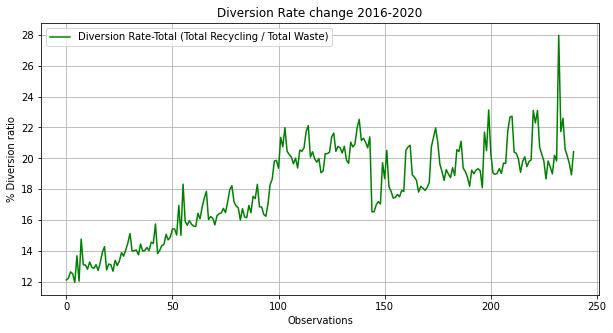

In [44]:
# Plotting Diversion Rate through the years
df3=df2.copy()
df3=df3.reset_index()
df3.plot( y="Diversion Rate-Total (Total Recycling / Total Waste)", figsize=(10,5),color="g",title='Diversion Rate change 2016-2020', grid=True)
plt.xlabel("Observations")
plt.ylabel("% Diversion ratio")

In [45]:
# Organize the dataset per Borough and Year
cap_rate = Monthly_Recycling_Diversion.copy()
cap_rate_pap = cap_rate.groupby(['BOROUGH','YEAR']).agg({'Capture Rate-Paper (Total Paper / Max Paper)':"mean"})
cap_rate_mgp = cap_rate.groupby(['BOROUGH','YEAR']).agg({'Capture Rate-MGP (Total MGP / Max MGP)':"mean"})
cap_rate_div = cap_rate.groupby(['BOROUGH','YEAR']).agg({'Diversion Rate-Total (Total Recycling / Total Waste)':"mean"})
cap_rate_pap

Capture Rate-Paper (Total Paper / Max Paper)
BOROUGH       YEAR                                              
Bronx         2016                                     31.255556
              2017                                     31.743056
              2018                                     31.172917
              2019                                     31.688194
              2020                                     31.918056
Brooklyn      2016                                     39.100000
              2017                                     39.731019
              2018                                     39.407870
              2019                                     39.801389
              2020                                     38.828704
Manhattan     2016                                     40.540278
              2017                                     41.476389
              2018                                     40.100000
              2019                                     41.238194
              2020                                     41.413889
Queens        2016                                     39.751190
              2017                                     40.585714
              2018                                     39.121429
              2019                                     39.261310
              2020                                     38.536905
Staten Island 2016                                     44.294444
              2017                                     44.916667
              2018                                     44.300000
              2019                                     44.133333
              2020                                     44.922222

In [46]:
# Plotting Diversion rate and Capture rates

output_file("graphs1.html")

Boroughs = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
cols = [ 'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP']
colors = ["#c9d9d3", "#718dbf", '#DC5039']    

sixteen = {'Boroughs' : ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                'Diversion Rate-Total'   : [12.53, 15.41, 19.56, 17.34, 19.43],
                 'Capture Rate-Paper'  : [31.26,31.10,40.54,39.75,44.29],
                 'Capture Rate-MGP' : [48.66,51.53,57.74,63.91,69.99]
        }
    
p1 = figure(x_range=Boroughs, plot_width = 800, plot_height = 400, title="Diversion and Capture rates for each borough in 2016",
           toolbar_location="below", tools="pan,wheel_zoom,box_zoom,reset")
tab1 = Panel(child=p1, title="2016")
p1.vbar_stack(cols, x='Boroughs', width=0.9, color=colors, source=sixteen,
             legend_label=cols,alpha=0.8, muted_alpha=0.2)

p1.y_range.start = 0
p1.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.axis.minor_tick_line_color = None
p1.outline_line_color = None
p1.legend.location = "top_right"
p1.legend.orientation = "vertical"
p1.legend.click_policy="mute"

#===========================================================================================================
#===========================================================================================================

Boroughs = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
cols = [ 'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP']
colors = ["#c9d9d3", "#718dbf", '#DC5039']    

seventeen = {'Boroughs' : ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                'Diversion Rate-Total'   : [13.19, 16.22, 20.50, 18.53, 20.27],
                 'Capture Rate-Paper'  : [13.19, 16.22, 20.50, 18.53, 20.27],
                 'Capture Rate-MGP' : [58.00, 58.82, 64.76, 72.93, 81.91]
        }
   
p2 = figure(x_range=Boroughs, plot_width = 800, plot_height = 400, title="Diversion and Capture rates for each borough in 2017",
           toolbar_location="below", tools="pan,wheel_zoom,box_zoom,reset")
tab2 = Panel(child=p2, title="2017")
p2.vbar_stack(cols, x='Boroughs', width=0.9, color=colors, source=seventeen,
             legend_label=cols,alpha=0.8, muted_alpha=0.2)

p2.y_range.start = 0
p2.x_range.range_padding = 0.1
p2.xgrid.grid_line_color = None
p2.axis.minor_tick_line_color = None
p2.outline_line_color = None
p2.legend.location = "top_right"
p2.legend.orientation = "vertical"
p2.legend.click_policy="mute"

#===========================================================================================================
#===========================================================================================================

Boroughs = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
cols = [ 'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP']
colors = ["#c9d9d3", "#718dbf", '#DC5039']    

eighteen = {'Boroughs' : ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                'Diversion Rate-Total'   : [13.50, 16.63, 20.25, 18.98, 20.58],
                 'Capture Rate-Paper'  : [31.17,39.41,40.10,39.12,44.30],
                 'Capture Rate-MGP' : [53.21,56.46,62.68,71.57,79.97]
        }
    
p3 = figure(x_range=Boroughs, plot_width = 800, plot_height = 400, title="Diversion and Capture rates for each borough in 2018",
           toolbar_location="below", tools="pan,wheel_zoom,box_zoom,reset")
tab3 = Panel(child=p3, title="2018")
p3.vbar_stack(cols, x='Boroughs', width=0.9, color=colors, source=eighteen,
             legend_label=cols,alpha=0.8, muted_alpha=0.2)

p3.y_range.start = 0
p3.x_range.range_padding = 0.1
p3.xgrid.grid_line_color = None
p3.axis.minor_tick_line_color = None
p3.outline_line_color = None
p3.legend.location = "top_right"
p3.legend.orientation = "vertical"
p3.legend.click_policy="mute"

#===========================================================================================================
#===========================================================================================================

Boroughs = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
cols = [ 'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP']
colors = ["#c9d9d3", "#718dbf", '#DC5039']    

nineteen = {'Boroughs' : ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                'Diversion Rate-Total'   : [14.23, 16.89, 20.75, 19.72, 20.88],
                 'Capture Rate-Paper'  : [31.69,39.80,41.24,39.26,44.13],
                 'Capture Rate-MGP' : [54.94,57.32,62.27,72.23,76.93]
        }
    
p4 = figure(x_range=Boroughs, plot_width = 800, plot_height = 400, title="PDiversion and Capture rates for each borough in 2019",
           toolbar_location="below", tools="pan,wheel_zoom,box_zoom,reset")
tab4 = Panel(child=p4, title="2019")
p4.vbar_stack(cols, x='Boroughs', width=0.9, color=colors, source=nineteen,
             legend_label=cols,alpha=0.8, muted_alpha=0.2)

p4.y_range.start = 0
p4.x_range.range_padding = 0.1
p4.xgrid.grid_line_color = None
p4.axis.minor_tick_line_color = None
p4.outline_line_color = None
p4.legend.location = "top_right"
p4.legend.orientation = "vertical"
p4.legend.click_policy="mute"

#===========================================================================================================
#===========================================================================================================

Boroughs = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
cols = [ 'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP']
colors = ["#c9d9d3", "#718dbf", '#DC5039']    

twenty = {'Boroughs' : ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                'Diversion Rate-Total'   : [14.58, 16.95, 21.35, 19.30, 20.40],
                 'Capture Rate-Paper'  : [31.92,38.83,41.41,38.54,44.92],
                 'Capture Rate-MGP' : [58.00, 58.82, 64.76, 72.93, 81.91]
        }

    
p5 = figure(x_range=Boroughs, plot_width = 800, plot_height = 400, title="Diversion and Capture rates for each borough in 2020",
           toolbar_location="below", tools="pan,wheel_zoom,box_zoom,reset")
tab5 = Panel(child=p5, title="2020")
p5.vbar_stack(cols, x='Boroughs', width=0.9, color=colors, source=twenty,
             legend_label=cols,alpha=0.8, muted_alpha=0.2)

p5.y_range.start = 0
p5.x_range.range_padding = 0.1
p5.xgrid.grid_line_color = None
p5.axis.minor_tick_line_color = None
p5.outline_line_color = None
p5.legend.location = "top_right"
p5.legend.orientation = "vertical"
p5.legend.click_policy="mute"

tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5])

output_notebook()
show(tabs)

### Model Visualizations 

Text(0, 0.5, '% Diversion ratio')

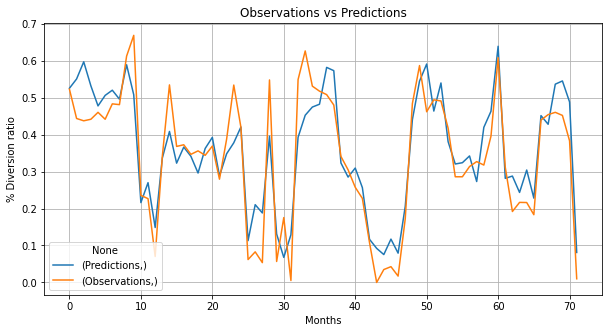

In [47]:
# Plotting Observations vs Predictions
Ob = pd.DataFrame(y_test)
Ob["Predictions"]=y_pred
Ob = Ob.reset_index(drop=True)
Ob["Observations"]=Ob["Diversion Rate-Total (Total Recycling / Total Waste)"]
del Ob["Diversion Rate-Total (Total Recycling / Total Waste)"]

Ob.plot(y=["Predictions","Observations"], figsize=(10,5),title='Observations vs Predictions', grid=True)
plt.xlabel("Months")
plt.ylabel("% Diversion ratio")

In [48]:
# Exploring the shap Values of the model
explainer = shap.LinearExplainer(model,x_test)
shap_values = explainer.shap_values(x_test)

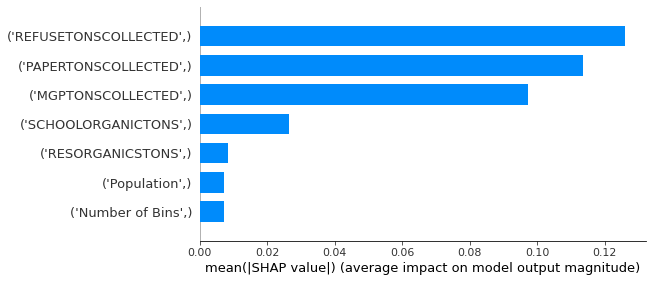

In [49]:
# Plotting importances
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [50]:
# Creating a forceplot of our model
shap.initjs()
f=shap.force_plot(explainer.expected_value, shap_values, x_test)
shap.save_html("index.htm", f)
f

**Comment:**<br>
The above visualization can be interacted with in multiple ways. The default visualization shows some interesting model prediction pattern decisions. We can observe the independent variables that have the most impact to our model through the time. For example in the first 14 test samples the ratios of the most importand variables have high prices. We can assume that these months include  holidays so the amount of garbage is bigger than normal. 


## Discussion

The overall goal of this analysis has been achieved we have an prediction model which is accurate with a score of 0.8, some area that could have been improved it would have been more accurate if we had the raw data for the **Recycling_Diversion_and_Capture_Rates** as if we had the figures which lead to the diversion rate our model would be trained on data which is more representative of the reality. or similarly if we had the diversion rates for the **DSNY_Monthly_Tonnage_Data** rather than having to combine the two separate datasets which lead to some of the data being omitted due to dates. However both these data were obtained by the NYC Department of Sanitation therefore the data originates from the same source and is still considered valid 

As we aggregated the data by borough we would have generalised the outcomes as data in New York would be observed by neighbourhoods. As the city is densely populated the rates of our the dependant variables can contrast greatly from neighbourhoods within the same borough. Just as property prices do. This originates from underlying socio economic factors how the wealth is distributed within the different boroughs. 

It is also interesting to note that We set the threshold of significance to 3% so  p-statistic should be less that 0.03. Thus, we decided to subtract the columns `random` and `LEAVESORGANICTONS` and retrain the model, which improved Accuracy the model. However, when we removed `RESORGANICSTONS` this caused the model to score to slightly decrease hence why we left it in however the `RESORGANICSTONS` but this increase maybe due to slight overfitting.

Had we had more data we can use the model to predict for specific insights such as seasonal behaviour of recycling and refuse tonnage for instance around the holiday season. with these insights proactive steps and initiatives can be taken to maintain high levels of diversion.

The insights from the analysis can be used to better optimise where recycling facilities are set up. For instance the folium map of facilities can be used to produce a poll and gather data on where and what type of facility new yorkers would like to see available in their neighbourhoods to produce better cohesion between the citizens of New York and City governmental agencies agenda.


Perhaps moving the focus should be spent more on gradually changing the habits and practices of new yorkers and soliciting the help of the UN to calculate some science based targets as opposed to a generic set goal of 2030 with initiatives being rolled out and amended as you go, this causes for a less streamlined focus.

## References

Information was derived from different data sources that are listed below:

1.   Retrieved from https://opendata.cityofnewyork.us/<br>
2.   Retrieved from https://www.howandwhentoreference.com<br>
3.   Retrieved from https://docs.bokeh.org/en/latest/index.html<br>
4.   Retrieved from https://python-visualization.github.io/folium/<br>
5.   Retrieved from https://stackoverflow.com/ <br>
6.   Retrieved from https://www.bloomberg.com/graphics/property-prices/nyc/
7.   Retrieved from https://www1.nyc.gov/home/search/index.page?earch-terms=zero+waste&sitesearch=www1.nyc.gov%2Fsite%2Fsustainability

## Contributions

Dimitris  | Eben 
-------------------|------------------
Explainer IPNB, 80%       | Explainer IPNB, 20% 
Site, 20%      | Site, 80% 